# Crop Recommendation

# Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd

# Load the datasets from the specified directory
crop_pesticides = pd.read_csv(r'C:\Users\mulei\Documents\crop_pesticides.csv')
crop_yield = pd.read_csv(r'C:\Users\mulei\Documents\crop_yield.csv')
rainfall = pd.read_excel(r'C:\Users\mulei\Documents\rainfall(1).xlsx')
temperature = pd.read_excel(r'C:\Users\mulei\Documents\temperature.xlsx')

# Display the first few rows of each dataset to verify the data
print("Crop Pesticides Dataset:")
print(crop_pesticides.head())
print("\nCrop Yield Dataset:")
print(crop_yield.head())
print("\nRainfall Dataset:")
print(rainfall.head())
print("\nTemperature Dataset:")
print(temperature.head())


Crop Pesticides Dataset:
  Domain Code          Domain  Area Code (M49)     Area  Element Code  \
0          RP  Pesticides Use                8  Albania          5157   
1          RP  Pesticides Use                8  Albania          5157   
2          RP  Pesticides Use                8  Albania          5157   
3          RP  Pesticides Use                8  Albania          5157   
4          RP  Pesticides Use                8  Albania          5157   

            Element  Item Code                Item  Year Code  Year Unit  \
0  Agricultural Use       1357  Pesticides (total)       1995  1995    t   
1  Agricultural Use       1357  Pesticides (total)       1996  1996    t   
2  Agricultural Use       1357  Pesticides (total)       1997  1997    t   
3  Agricultural Use       1357  Pesticides (total)       1998  1998    t   
4  Agricultural Use       1357  Pesticides (total)       1999  1999    t   

    Value Flag Flag Description             Note  
0  251.00    A  Official fig

# Data Cleaning

In [6]:
# Checking column names to identify correct names
print("Column names in Crop Pesticides Dataset:")
print(crop_pesticides.columns)

print("\nColumn names in Crop Yield Dataset:")
print(crop_yield.columns)

print("\nColumn names in Rainfall Dataset:")
print(rainfall.columns)

print("\nColumn names in Temperature Dataset:")
print(temperature.columns)


Column names in Crop Pesticides Dataset:
Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code', 'item', 'year_code', 'year', 'unit', 'value',
       'flag', 'flag_description', 'note'],
      dtype='object')

Column names in Crop Yield Dataset:
Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'note'],
      dtype='object')

Column names in Rainfall Dataset:
Index(['rainfall___(mm)', 'year', 'statistics', 'country', 'iso3'], dtype='object')

Column names in Temperature Dataset:
Index(['temperature___(celsius)', 'year', 'statistics', 'country', 'iso3'], dtype='object')


In [7]:
# Handling missing values by filling them with the mean (for numerical columns)
crop_yield['value'] = crop_yield['value'].fillna(crop_yield['value'].mean())
rainfall['rainfall___(mm)'] = rainfall['rainfall___(mm)'].fillna(rainfall['rainfall___(mm)'].mean())
temperature['temperature___(celsius)'] = temperature['temperature___(celsius)'].fillna(temperature['temperature___(celsius)'].mean())

# Ensuring appropriate data types
crop_yield['value'] = pd.to_numeric(crop_yield['value'], errors='coerce')
rainfall['rainfall___(mm)'] = pd.to_numeric(rainfall['rainfall___(mm)'], errors='coerce')
temperature['temperature___(celsius)'] = pd.to_numeric(temperature['temperature___(celsius)'], errors='coerce')

# Displaying the first few rows after cleaning
print("Crop Pesticides Dataset after cleaning:")
print(crop_pesticides.head())
print("\nCrop Yield Dataset after cleaning:")
print(crop_yield.head())
print("\nRainfall Dataset after cleaning:")
print(rainfall.head())
print("\nTemperature Dataset after cleaning:")
print(temperature.head())


Crop Pesticides Dataset after cleaning:
  domain_code          domain  area_code_(m49)     area  element_code  \
0          RP  Pesticides Use                8  Albania          5157   
1          RP  Pesticides Use                8  Albania          5157   
2          RP  Pesticides Use                8  Albania          5157   
3          RP  Pesticides Use                8  Albania          5157   
4          RP  Pesticides Use                8  Albania          5157   

            element  item_code                item  year_code  year unit  \
0  Agricultural Use       1357  Pesticides (total)       1995  1995    t   
1  Agricultural Use       1357  Pesticides (total)       1996  1996    t   
2  Agricultural Use       1357  Pesticides (total)       1997  1997    t   
3  Agricultural Use       1357  Pesticides (total)       1998  1998    t   
4  Agricultural Use       1357  Pesticides (total)       1999  1999    t   

    value flag flag_description             note  
0  251.00    

# Data Merging

In [8]:
# Merging the Crop Yield dataset with the Rainfall dataset
merged_data = pd.merge(crop_yield, rainfall, left_on=['area', 'year'], right_on=['country', 'year'], how='inner')

# Merging the resulting dataset with the Temperature dataset
merged_data = pd.merge(merged_data, temperature, left_on=['area', 'year'], right_on=['country', 'year'], how='inner')

# Dropping redundant columns
merged_data = merged_data.drop(columns=['country_x', 'iso3_x', 'country_y', 'iso3_y', 'statistics_x', 'statistics_y'])

# Displaying the first few rows of the merged dataset
print("Merged Dataset:")
print(merged_data.head())

# Checking data types to confirm the merge
print("\nData types in Merged Dataset:")
print(merged_data.dtypes)


Merged Dataset:
Empty DataFrame
Columns: [domain_code, domain, area_code_(m49), area, element_code, element, item_code_(cpc), item, year_code, year, unit, value, flag, flag_description, note, rainfall___(mm), temperature___(celsius)]
Index: []

Data types in Merged Dataset:
domain_code                 object
domain                      object
area_code_(m49)              int64
area                        object
element_code                 int64
element                     object
item_code_(cpc)            float64
item                        object
year_code                    int64
year                         int64
unit                        object
value                        int64
flag                        object
flag_description            object
note                       float64
rainfall___(mm)            float64
temperature___(celsius)    float64
dtype: object


In [9]:
# Checking unique values in the 'area' and 'country' columns to ensure they match
print("Unique 'area' values in Crop Yield Dataset:")
print(crop_yield['area'].unique())

print("\nUnique 'country' values in Rainfall Dataset:")
print(rainfall['country'].unique())

print("\nUnique 'country' values in Temperature Dataset:")
print(temperature['country'].unique())

# Checking unique year values
print("\nUnique 'year' values in Crop Yield Dataset:")
print(crop_yield['year'].unique())

print("\nUnique 'year' values in Rainfall Dataset:")
print(rainfall['year'].unique())

print("\nUnique 'year' values in Temperature Dataset:")
print(temperature['year'].unique())


Unique 'area' values in Crop Yield Dataset:
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'China, Hong Kong SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Ethiopia PDR' 'Faroe Islands'
 'Fiji' 'Finland' 'France' 'Fre

In [12]:
# Inspecting columns in the merged dataset to identify which ones to drop
print("Columns in the Merged Dataset:")
print(merged_data.columns)


Columns in the Merged Dataset:
Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'note', 'rainfall___(mm)',
       'statistics_x', 'country', 'iso3_x', 'temperature___(celsius)',
       'statistics_y', 'iso3_y'],
      dtype='object')


In [13]:
# Dropping only existing redundant columns
columns_to_drop = ['iso3', 'statistics']  # Modify based on the actual column names
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

# Displaying the first few rows of the merged dataset
print("Merged Dataset:")
print(merged_data.head())

# Checking data types to confirm the merge
print("\nData types in Merged Dataset:")
print(merged_data.dtypes)


Merged Dataset:
  domain_code                        domain  area_code_(m49)         area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   element_code element  item_code_(cpc)          item  year_code  year  ...  \
0          5419   Yield            112.0  Maize (corn)       1985  1985  ...   
1          5419   Yield            112.0  Maize (corn)       1985  1985  ...   
2          5419   Yield            112.0  Maize (corn)       1985  1985  ...   
3          5419   Yield            112.0  Maize (corn)       1985  1985  ...   
4          5419   Yield            112.0  Maize (corn)       1985  1985  ...   

  flag                         flag_desc

In [14]:
# Dropping redundant columns
columns_to_drop = ['country', 'iso3_x', 'iso3_y', 'statistics_x', 'statistics_y']
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

# Displaying the first few rows of the cleaned merged dataset
print("Cleaned Merged Dataset:")
print(merged_data.head())

# Checking data types to confirm the clean-up
print("\nData types in Cleaned Merged Dataset:")
print(merged_data.dtypes)


Cleaned Merged Dataset:
  domain_code                        domain  area_code_(m49)         area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   element_code element  item_code_(cpc)          item  year_code  year  \
0          5419   Yield            112.0  Maize (corn)       1985  1985   
1          5419   Yield            112.0  Maize (corn)       1985  1985   
2          5419   Yield            112.0  Maize (corn)       1985  1985   
3          5419   Yield            112.0  Maize (corn)       1985  1985   
4          5419   Yield            112.0  Maize (corn)       1985  1985   

       unit  value flag                         flag_descripti

# Handling Categorical Variables

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns for encoding
categorical_cols = ['domain', 'element', 'item', 'unit', 'flag', 'flag_description']

# One-Hot Encoding categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
encoded_features = encoder.fit_transform(merged_data[categorical_cols])

# Creating a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenating the encoded features with the original dataset (excluding original categorical columns)
merged_data_encoded = pd.concat([merged_data.drop(columns=categorical_cols), encoded_df], axis=1)

# Displaying the first few rows of the dataset after encoding
print("Dataset after One-Hot Encoding:")
print(merged_data_encoded.head())


Dataset after One-Hot Encoding:
  domain_code  area_code_(m49)         area  element_code  item_code_(cpc)  \
0         QCL                4  Afghanistan          5419            112.0   
1         QCL                4  Afghanistan          5419            112.0   
2         QCL                4  Afghanistan          5419            112.0   
3         QCL                4  Afghanistan          5419            112.0   
4         QCL                4  Afghanistan          5419            112.0   

   year_code  year  value  note  rainfall___(mm)  ...  \
0       1985  1985  16652   NaN          52.0363  ...   
1       1985  1985  16652   NaN          52.0363  ...   
2       1985  1985  16652   NaN          52.0363  ...   
3       1985  1985  16652   NaN          52.0363  ...   
4       1985  1985  16652   NaN          52.0363  ...   

   item_Pumpkins, squash and gourds  item_Soya beans  item_Spinach  \
0                               0.0              0.0           0.0   
1               

# Scaling Features

In [16]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = ['value', 'rainfall___(mm)', 'temperature___(celsius)']

# Standardizing the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data_encoded[numerical_cols])

# Creating a DataFrame from the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)

# Updating the original dataframe with scaled values
for col in numerical_cols:
    merged_data_encoded[col] = scaled_df[col]

# Displaying the first few rows of the dataset after scaling
print("Dataset after Scaling:")
print(merged_data_encoded.head())


Dataset after Scaling:
  domain_code  area_code_(m49)         area  element_code  item_code_(cpc)  \
0         QCL                4  Afghanistan          5419            112.0   
1         QCL                4  Afghanistan          5419            112.0   
2         QCL                4  Afghanistan          5419            112.0   
3         QCL                4  Afghanistan          5419            112.0   
4         QCL                4  Afghanistan          5419            112.0   

   year_code  year    value  note  rainfall___(mm)  ...  \
0       1985  1985 -0.46951   NaN        -0.420354  ...   
1       1985  1985 -0.46951   NaN        -0.420354  ...   
2       1985  1985 -0.46951   NaN        -0.420354  ...   
3       1985  1985 -0.46951   NaN        -0.420354  ...   
4       1985  1985 -0.46951   NaN        -0.420354  ...   

   item_Pumpkins, squash and gourds  item_Soya beans  item_Spinach  \
0                               0.0              0.0           0.0   
1            

# Exploratory Data Analysis (EDA)

Descriptive Statistics for Numerical Features:
       area_code_(m49)  element_code  item_code_(cpc)     year_code  \
count     5.262624e+06     5262624.0     5.262624e+06  5.262624e+06   
mean      4.115603e+02        5419.0     1.020214e+03  2.000493e+03   
std       2.443450e+02           0.0     5.866695e+02  8.960046e+00   
min       4.000000e+00        5419.0     1.110000e+02  1.985000e+03   
25%       2.120000e+02        5419.0     1.410000e+02  1.993000e+03   
50%       4.000000e+02        5419.0     1.233000e+03  2.000000e+03   
75%       6.080000e+02        5419.0     1.373000e+03  2.009000e+03   
max       8.940000e+02        5419.0     1.802000e+03  2.015000e+03   

               year         value  note  rainfall___(mm)  \
count  5.262624e+06  5.262624e+06   0.0     5.262624e+06   
mean   2.000493e+03 -3.110787e-17   NaN    -5.584728e-16   
std    8.960046e+00  1.000000e+00   NaN     1.000000e+00   
min    1.985000e+03 -5.173856e-01   NaN    -9.353482e-01   
25%    1.9930

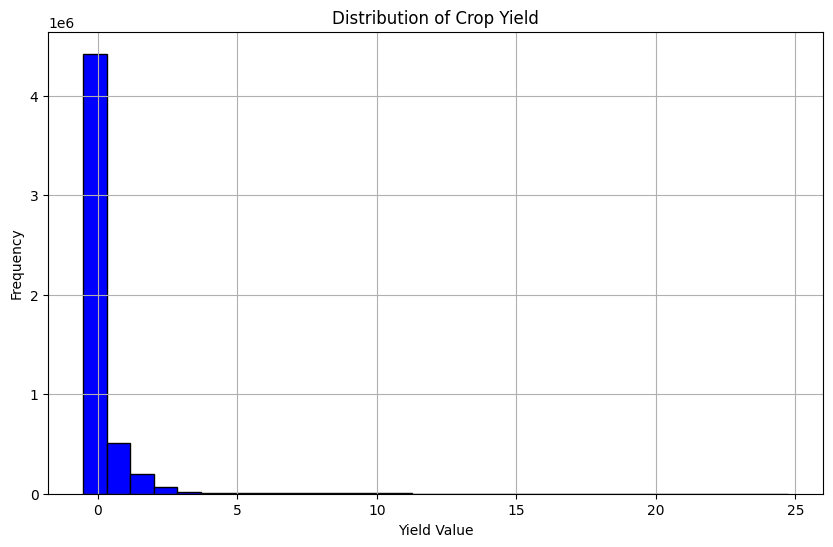

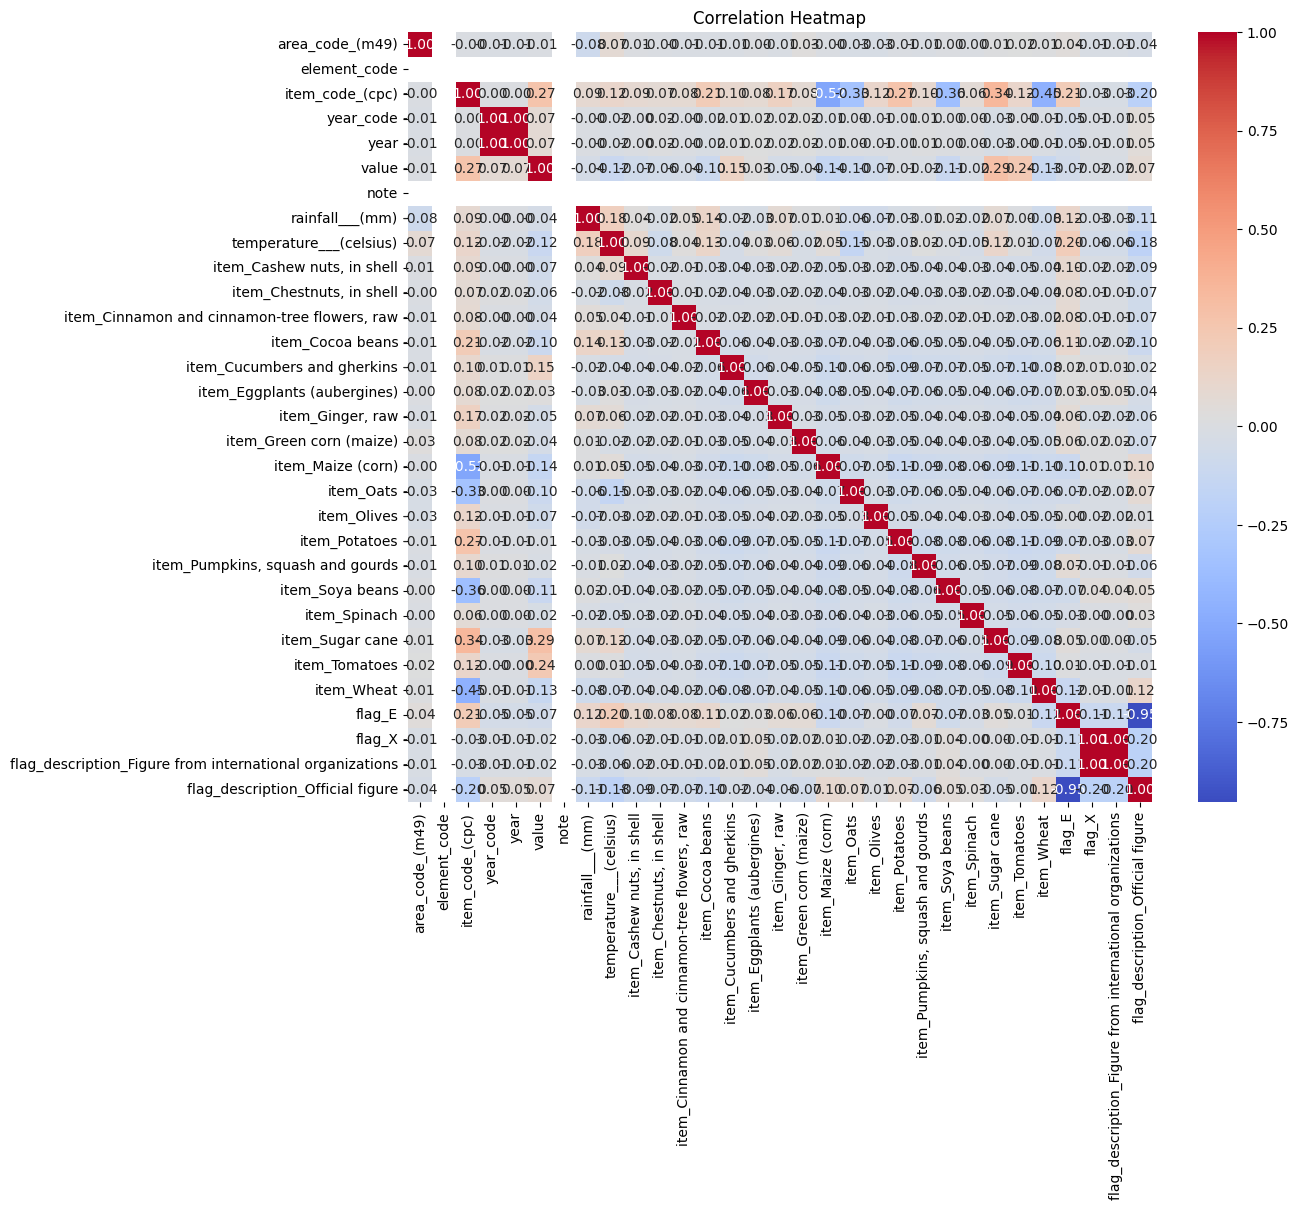

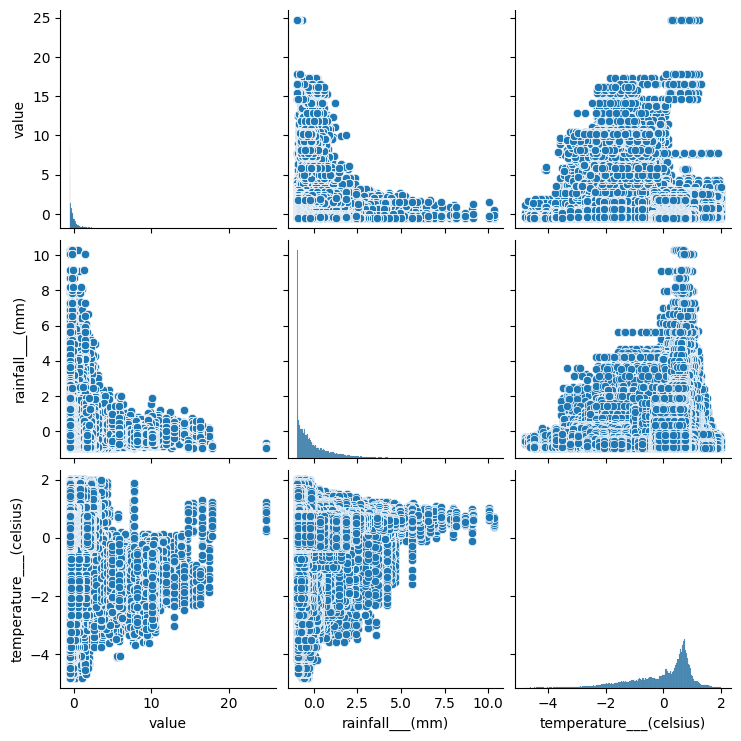

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data_encoded is the processed dataset from the previous steps

# 2.1. Descriptive Statistics
# Descriptive statistics for numerical features
numerical_stats = merged_data_encoded.describe()
print("Descriptive Statistics for Numerical Features:")
print(numerical_stats)

# 2.2. Data Visualization

# 2.2.1. Histogram of the Target Variable (Crop Yield)
plt.figure(figsize=(10, 6))
plt.hist(merged_data_encoded['value'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2.2.2. Correlation Heatmap
# Selecting only numeric columns for correlation matrix
numeric_columns = merged_data_encoded.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data_encoded[numeric_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2.2.3. Pair Plot for Selected Features
# Pair plot for selected features
selected_features = ['value', 'rainfall___(mm)', 'temperature___(celsius)']
sns.pairplot(merged_data_encoded[selected_features])
plt.show()


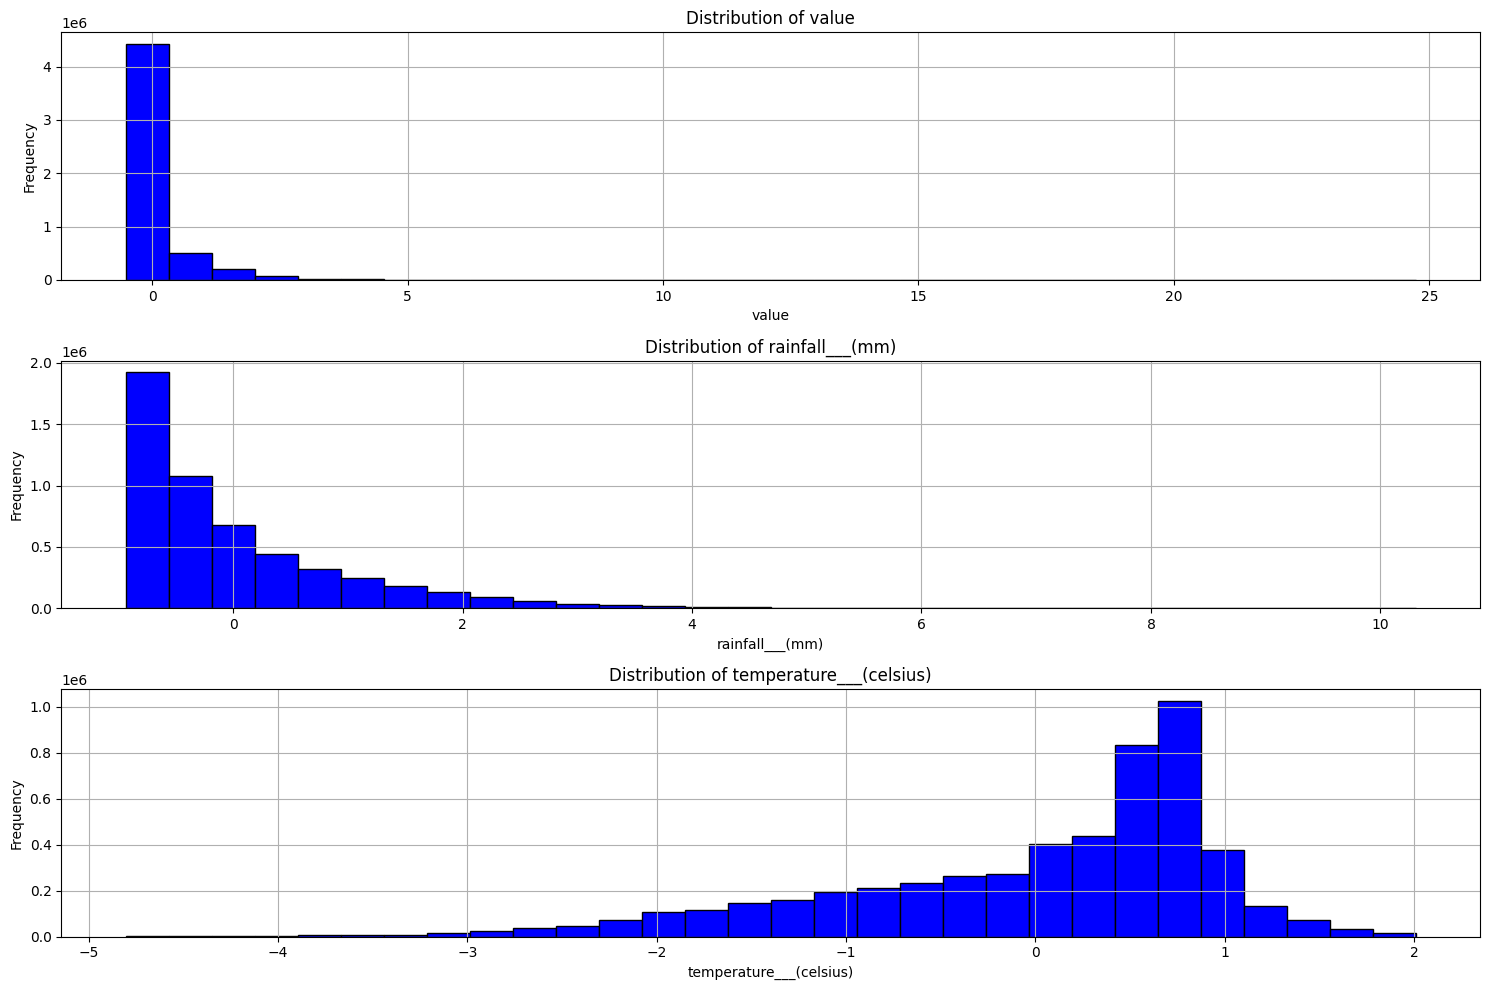

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data_encoded is the processed dataset from the previous steps

# List of numerical columns to visualize
numerical_columns = ['value', 'rainfall___(mm)', 'temperature___(celsius)']

# Plotting histograms for each numerical feature
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.hist(merged_data_encoded[column], bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()


# Correlation Analysis

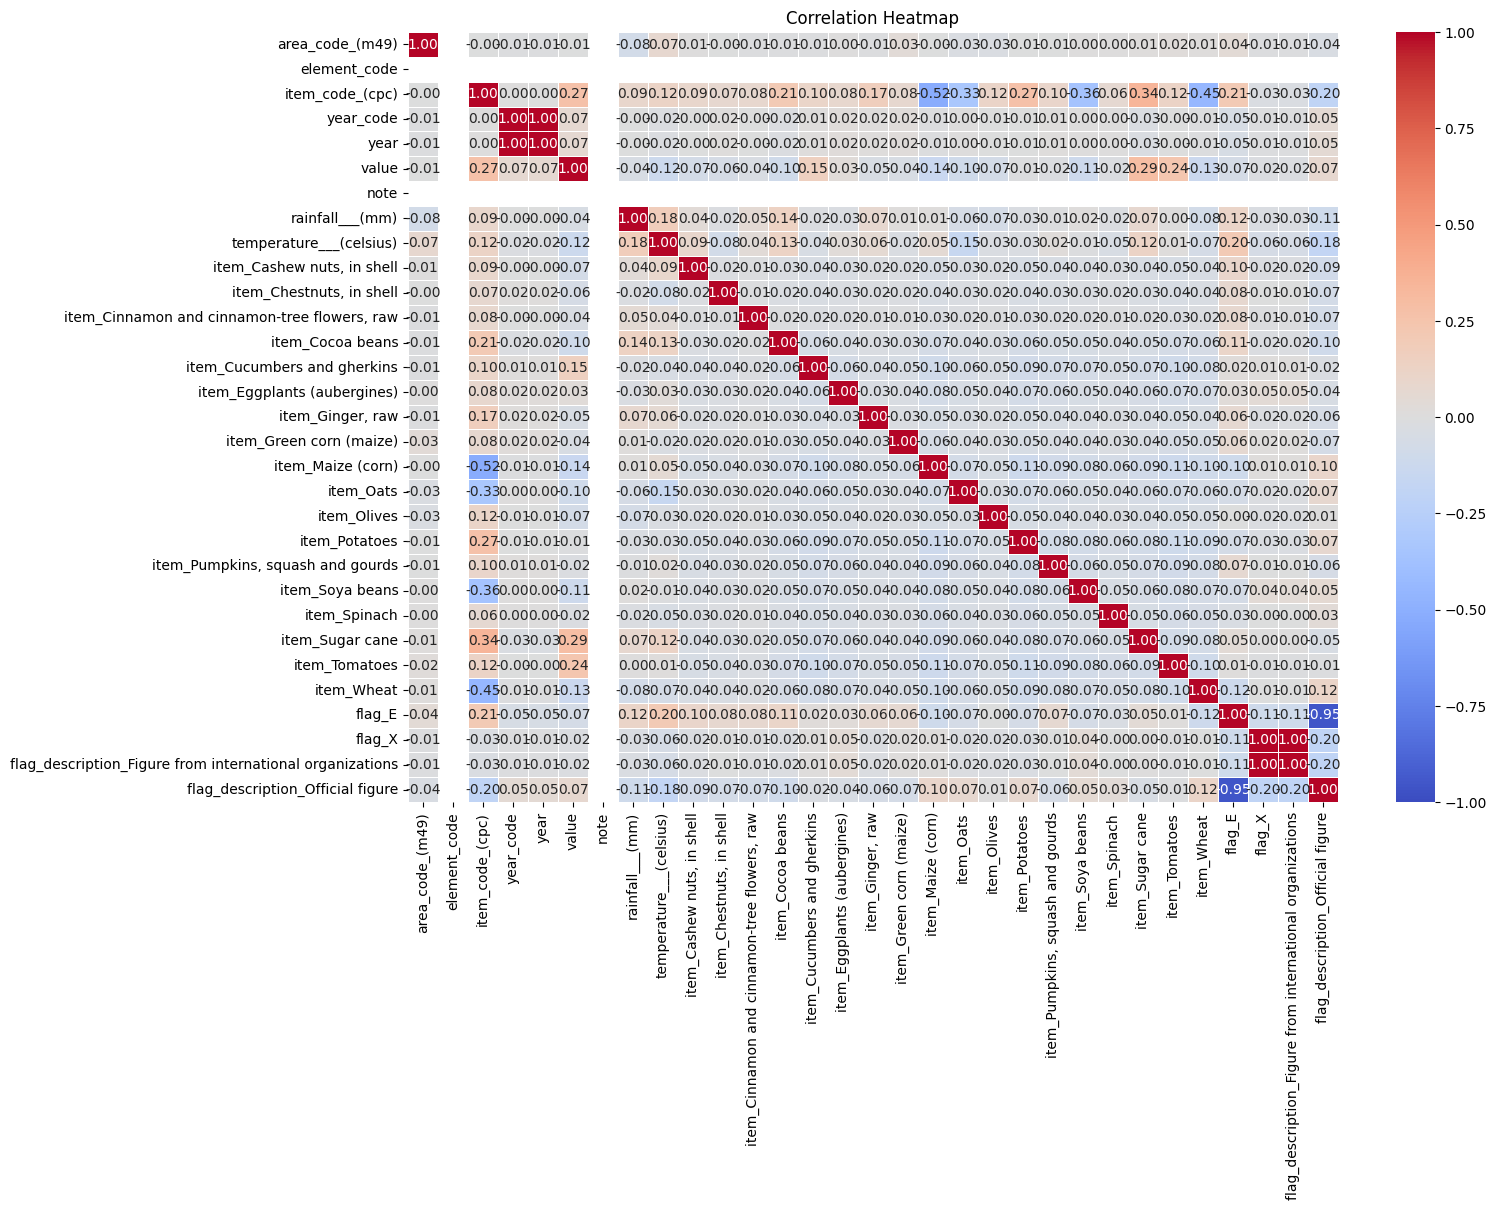

In [21]:
# Selecting only the numerical columns for correlation analysis
numerical_columns = merged_data_encoded.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Model Implementation and Evaluation

In [19]:
# Displaying the column names of each dataset
print("Crop Yield Dataset Columns:", crop_yield.columns)
print("Rainfall Dataset Columns:", rainfall.columns)
print("Temperature Dataset Columns:", temperature.columns)


Crop Yield Dataset Columns: Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')
Rainfall Dataset Columns: Index(['Rainfall - (MM)', 'Year', ' Statistics', 'Country', ' ISO3'], dtype='object')
Temperature Dataset Columns: Index(['Temperature - (Celsius)', 'Year', ' Statistics', 'Country', ' ISO3'], dtype='object')


In [20]:
# Removing leading spaces from column names
rainfall.columns = rainfall.columns.str.strip()
temperature.columns = temperature.columns.str.strip()

# Merging datasets
merged_data = pd.merge(crop_yield, rainfall, how='inner', left_on=['Area', 'Year'], right_on=['Country', 'Year'])
merged_data = pd.merge(merged_data, temperature, how='inner', left_on=['Area', 'Year'], right_on=['Country', 'Year'])

# Check the number of rows in the merged dataset
print("Number of rows in the merged dataset:", len(merged_data))
print("Merged Dataset Columns:", merged_data.columns)


Number of rows in the merged dataset: 0
Merged Dataset Columns: Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'Note', 'Rainfall - (MM)',
       'Statistics_x', 'Country_x', 'ISO3_x', 'Temperature - (Celsius)',
       'Statistics_y', 'Country_y', 'ISO3_y'],
      dtype='object')


In [24]:
# Define features (X) and target variable (y)
X = merged_data.drop(columns=['Value'])
y = merged_data['Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Data split into training and testing sets.
Training set size: 4210099 samples
Testing set size: 1052525 samples


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'DecisionTree': DecisionTreeRegressor(),
    'SVM': SVR(),
    'RandomForest': RandomForestRegressor(),
    'KMeans': KMeans(n_clusters=3)
}

# Train and evaluate models
for name, model in models.items():
    if name != 'KMeans':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - MSE: {mse}, R2: {r2}")
    else:
        model.fit(X_train)
        y_pred = model.predict(X_test)
        print(f"{name} - Inertia: {model.inertia_}")


DecisionTree - MSE: 135.02647410699026, R2: 0.9999999990891032


# Model Implementation and Evaluation with Reduced Dataset

# Decision Tree, Random Forest and K-Means Clustering

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

# Load datasets
temperature_df = pd.read_excel(r'C:\Users\mulei\Documents\temperature.xlsx')
rainfall_df = pd.read_excel(r'C:\Users\mulei\Documents\rainfall(1).xlsx')
crop_yield_df = pd.read_csv(r'C:\Users\mulei\Documents\crop_yield.csv')
crop_pesticides_df = pd.read_csv(r'C:\Users\mulei\Documents\crop_pesticides.csv')

# Stripping leading and trailing spaces from column names
temperature_df.columns = temperature_df.columns.str.strip()
rainfall_df.columns = rainfall_df.columns.str.strip()
crop_yield_df.columns = crop_yield_df.columns.str.strip()
crop_pesticides_df.columns = crop_pesticides_df.columns.str.strip()

# Stripping leading and trailing spaces from 'Country' and 'Area' columns
temperature_df['Country'] = temperature_df['Country'].str.strip()
rainfall_df['Country'] = rainfall_df['Country'].str.strip()
crop_yield_df['Area'] = crop_yield_df['Area'].str.strip()
crop_pesticides_df['Area'] = crop_pesticides_df['Area'].str.strip()

# Merging datasets on 'Year' and 'Country'
merged_df = pd.merge(temperature_df, rainfall_df, on=['Year', 'Country', 'ISO3', 'Statistics'])
merged_df = pd.merge(merged_df, crop_yield_df, left_on=['Year', 'Country'], right_on=['Year', 'Area'])
merged_df = pd.merge(merged_df, crop_pesticides_df, left_on=['Year', 'Country'], right_on=['Year', 'Area'])

# Dropping the 'Note_x' column as it contains no observed values
merged_df = merged_df.drop(columns=['Note_x'])

# Dropping non-numeric columns
non_numeric_cols = merged_df.select_dtypes(include=['object']).columns
merged_df = merged_df.drop(columns=non_numeric_cols)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(merged_df)

# Converting the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=merged_df.columns)

# Prepare target variable
y = merged_df['Value_x']

# Reduce the size of the dataset for testing purposes
X_sample = X_imputed_df.sample(n=1000, random_state=42)
y_sample = y[X_sample.index]

# Split the reduced data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize models
models = {
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42),  # Simplified for speed
    'KMeans': KMeans(n_clusters=3, max_iter=1000, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    if name != 'KMeans':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} - MSE: {mse}, R2: {r2}")
    else:
        model.fit(X_train)
        y_pred = model.predict(X_test)
        print(f"{name} - Inertia: {model.inertia_}")


DecisionTree - MSE: 47047622.525, R2: 0.9995213929796193
RandomForest - MSE: 163093387.08482847, R2: 0.9983408802433112
KMeans - Inertia: 21219312922037.805


# Model Fine-Tuning and Hyperparameter Optimization

In [3]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 7, 10]},
    'RandomForest': {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7, 10]}
}

# Fine-tune DecisionTree
dt_grid_search = GridSearchCV(DecisionTreeRegressor(), param_grids['DecisionTree'], cv=3, scoring='r2')
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Best DecisionTree - MSE: {mse_dt}, R2: {r2_dt}, Best Params: {dt_grid_search.best_params_}")

# Fine-tune RandomForest
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grids['RandomForest'], cv=3, scoring='r2')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Best RandomForest - MSE: {mse_rf}, R2: {r2_rf}, Best Params: {rf_grid_search.best_params_}")


Best DecisionTree - MSE: 2303185312.784135, R2: 0.976570109162255, Best Params: {'max_depth': 5}
Best RandomForest - MSE: 112976672.28532358, R2: 0.998850708588595, Best Params: {'max_depth': 7, 'n_estimators': 10}


# Fine-Tuning RandomForest

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for RandomForest
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7, 10]
}

# Initialize and perform GridSearchCV for RandomForest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')
rf_grid_search.fit(X_train, y_train)

# Get the best model and predict
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Best RandomForest - MSE: {mse_rf}, R2: {r2_rf}, Best Params: {rf_grid_search.best_params_}")


Best RandomForest - MSE: 168914206.8476016, R2: 0.9982816660885183, Best Params: {'max_depth': 7, 'n_estimators': 100}


In [5]:
from sklearn.svm import SVR

# Initialize and train SVM model with simplified parameters
svm_model = SVR(kernel='linear', max_iter=1000)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM - MSE: {mse_svm}, R2: {r2_svm}")


SVM - MSE: 0.01345213742254304, R2: 0.9999999999998631


C:\Users\mulei\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [6]:
from sklearn.cluster import KMeans

# Define parameter grid for KMeans
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'max_iter': [300, 600, 1000]
}

# Initialize and perform GridSearchCV for KMeans
kmeans_grid_search = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=3)
kmeans_grid_search.fit(X_train)

# Get the best model and predict
best_kmeans_model = kmeans_grid_search.best_estimator_
y_pred_kmeans = best_kmeans_model.predict(X_test)

# Evaluate the model
print(f"Best KMeans - Inertia: {best_kmeans_model.inertia_}, Best Params: {kmeans_grid_search.best_params_}")


Best KMeans - Inertia: 10657356148764.922, Best Params: {'max_iter': 300, 'n_clusters': 5}


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM model with simplified parameters
svm_model = SVR(kernel='linear', max_iter=1000)
svm_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print(f"SVM - MSE: {mse_svm}, R2: {r2_svm}")


SVM - MSE: 103509925313.18114, R2: -0.05298789344020327


In [8]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KMeans
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'max_iter': [300, 600, 1000]
}

# Initialize and perform GridSearchCV for KMeans
kmeans_grid_search = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=3)
kmeans_grid_search.fit(X_train)

# Get the best model and predict
best_kmeans_model = kmeans_grid_search.best_estimator_
y_pred_kmeans = best_kmeans_model.predict(X_test)

# Evaluate the model
print(f"Best KMeans - Inertia: {best_kmeans_model.inertia_}, Best Params: {kmeans_grid_search.best_params_}")


Best KMeans - Inertia: 10657356148764.922, Best Params: {'max_iter': 300, 'n_clusters': 5}
